In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 讀取資料檔
app_train = pd.read_csv(r'C:\Users\user\Desktop\ML_marathon\dataset\application_train.csv')
app_train.shape

(307511, 122)

In [3]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
# 觀察相關係數
#coe = app_train.corr()['DAYS_BIRTH']

In [6]:
cut_rule = [0,10,20,30,40,50,60,70,80,90,100]
app_train['DAYS_BIRTH_IN_YEAR'] = app_train['DAYS_BIRTH']/365
app_train['DAYS_BIRTH_IN_YEAR'] = pd.cut(app_train['DAYS_BIRTH_IN_YEAR'].values, cut_rule, include_lowest=True)
app_train['DAYS_BIRTH_IN_YEAR'].value_counts()

(30.0, 40.0]      82308
(40.0, 50.0]      76541
(50.0, 60.0]      68062
(20.0, 30.0]      45021
(60.0, 70.0]      35579
(90.0, 100.0]         0
(80.0, 90.0]          0
(70.0, 80.0]          0
(10.0, 20.0]          0
(-0.001, 10.0]        0
Name: DAYS_BIRTH_IN_YEAR, dtype: int64

In [7]:
grp = ['DAYS_BIRTH_IN_YEAR']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

DAYS_BIRTH_IN_YEAR
(-0.001, 10.0]              NaN
(10.0, 20.0]                NaN
(20.0, 30.0]      159520.624754
(30.0, 40.0]      178888.784549
(40.0, 50.0]      180565.509225
(50.0, 60.0]      165128.297171
(60.0, 70.0]      138897.496600
(70.0, 80.0]                NaN
(80.0, 90.0]                NaN
(90.0, 100.0]               NaN
Name: AMT_INCOME_TOTAL, dtype: float64

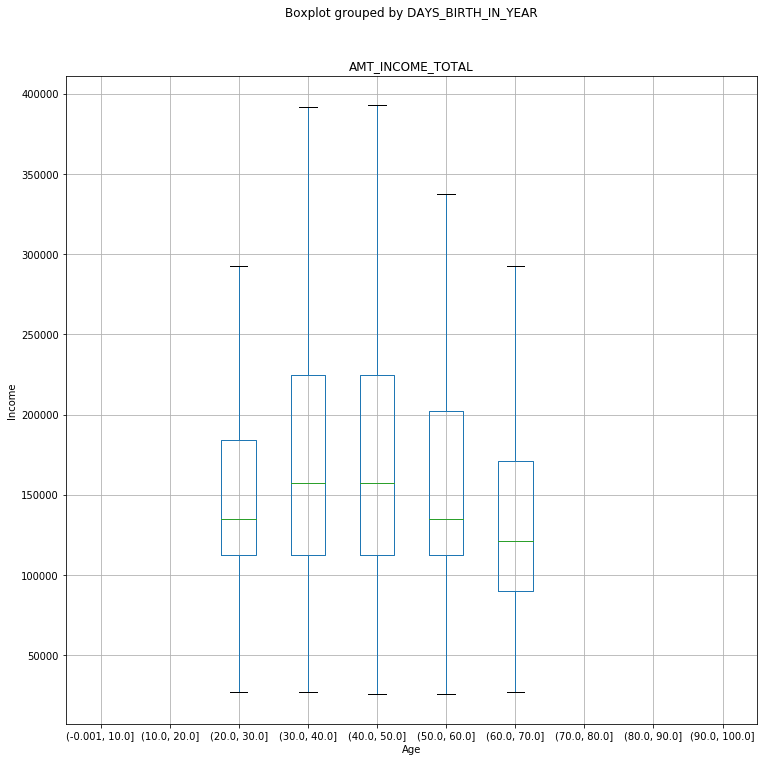

In [8]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['DAYS_BIRTH_IN_YEAR']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#收入在 30-50歲間較高，之後隨著年紀遞減

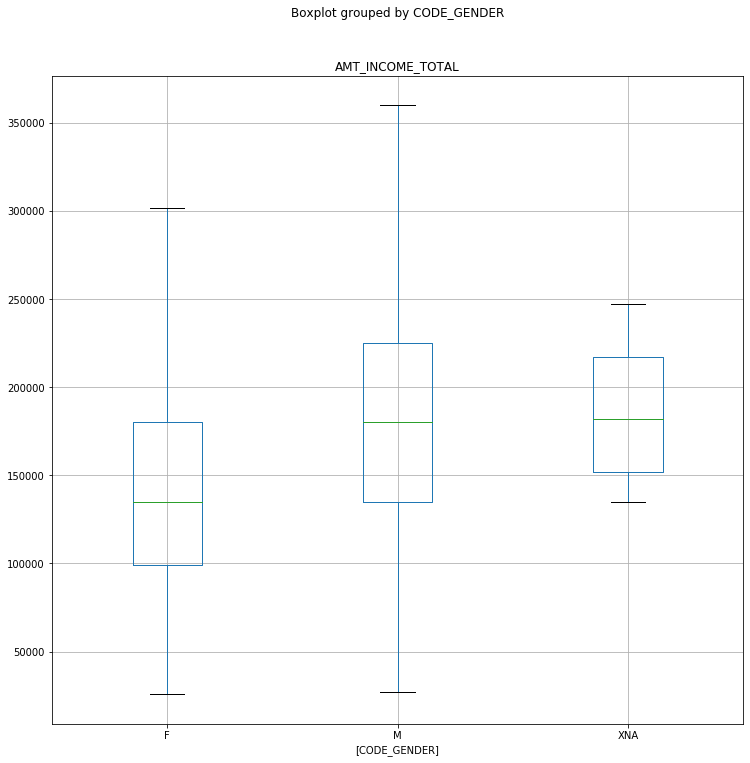

In [15]:
grp = ['NAME_EDUCATION_TYPE']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['NAME_EDUCATION_TYPE']
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.show()

#隨著教育程度越高，收入也越高。